# Investigation over small lossy compression systems by exhaustive enumeration of solutions

## Problem statement

Given:
- an input vector $y\in\mathbb{GF}(q)^n$
- an $n-k$-by-$n$ "parity-check" matrix $H$ also taking values in $\mathbb{GF}(q)$,
find the vector $x\in\mathbb{GF}(q)^n$ minimizing the energy function

$$E(x) = \beta_1 N_{unsat checks}(x) + \beta_2 d_H(x,y) $$  
where 
- $N_{unsat checks}(x) = \sum_{f=1}^{n-k} \mathbb{I}[H_{fv}x_v\neq0]$ 
- $d_H$ is the Hamming distance

In the limit $\beta_1 \gg \beta_2$ the check constraints become infinitely rigid and we recover the compression problem.

In the following, we refer as _solutions_ to those configurations $x$ that satisfy all the constraints.

## Show the working of functions

### Build an instance of the problem

Include dependencies. Most of the methods used here are user-defined.

In [23]:
include("../code/headers.jl")

mpldefault (generic function with 1 method)

Define the system size and variable domain

In [3]:
q = 2     # work on 𝔾𝔽(q=2)
n = 20    # number of variables ⟷ length of the vector to be compressed 
k = 2     # length of compressed vector
m = n-k   # number of constraints ⟷ parity checks in the factor graph 

18

Initialize a variable of the pre-defined type `LossyModel` 

In [4]:
seed = 1000;     # make this code reproducible
lm = LossyModel(q,n,m, randseed=seed)

Lossy compression model:
 - Factor Graph with n=20 variables and m=18 factors defined on GF(2)
 - Inverse temperatures β₁=Inf for checks and β₂=1.0 for overlap


Such object contains:
- A randomly constructed factor graph (⟷ parity check matrix) `lm.fg` with the requested number of variables (`n`) and factors (`m`)
- A randomly extracted source vector `lm.y` of length `n`
- Two temperatures for constraints `lm.beta1` and overlap `lm.beta2` which left as variables for e.g. Monte Carlo simulations
- A guess `lm.x` of lenth `n` for the solution of the compression problem, which gets updated when solvers iterate over the object

The one just shown is the way to construct a `LossyModel` object from minimal input, the rest of the parameters are chosen by default or extracted randomly. Alternatively, one can specify a particular graph, input vector and so on
 (Run `methods(LossyModel)` or take a look at LossyModel.jl for more details).

We can get information about the problem instance just created.
For example, show the adjacency matrix

In [6]:
H = adjmat(lm)

18×20 Array{Int64,2}:
 1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  0  0  0
 0  0  0  0  1  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  1  0  1  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  1  0  0
 0  1  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  1  0  0  0  0  1  0  0  0  0  0
 0  0  0  1  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  1
 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  1
 0  0  1  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0
 1  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  1  0  0  0  0  0  0  0  0  1  0  1  0  0  0  0
 0  1  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  1  0
 0  0  0  0  0  0 

Show the source vector

In [7]:
y = lm.y
@show y;

y = [1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1]


### Some linear algebra on GF(q)

One can ask i.e. for the rank of the homogeneous system defined by matrix H

In [8]:
rank(lm)

17

Did we build a parity-check matrix whose rank is equal to the number of rows?
If yes, then the number of solutions will actually be $q^{k}$

In [9]:
isfullrank(lm)

false

Ouch! 
However, this should happen with vanishing probability as we make the system size grow, right?

We can also build a basis for the kernel

In [10]:
nullspace(lm)

20×3 Array{Int64,2}:
 1  0  0
 0  1  0
 0  1  0
 1  0  0
 1  0  0
 1  0  0
 0  1  0
 1  0  0
 0  1  0
 1  0  0
 0  1  0
 1  0  0
 0  1  0
 1  0  1
 1  0  0
 0  0  1
 0  0  1
 1  0  0
 0  0  0
 0  1  0

From here it is easy to produce a list of all the solutions (linear combinations of the basis vectors

In [11]:
sols = enum_solutions(lm)

8-element Array{Array{Int64,1},1}:
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0]
 [0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1]
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0]
 [1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0]
 [0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1]
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1]

Re-organize them as columns of a matrix

In [12]:
solutions_as_matrix = hcat(sols...)

20×8 Array{Int64,2}:
 0  1  0  1  0  1  0  1
 0  0  1  1  0  0  1  1
 0  0  1  1  0  0  1  1
 0  1  0  1  0  1  0  1
 0  1  0  1  0  1  0  1
 0  1  0  1  0  1  0  1
 0  0  1  1  0  0  1  1
 0  1  0  1  0  1  0  1
 0  0  1  1  0  0  1  1
 0  1  0  1  0  1  0  1
 0  0  1  1  0  0  1  1
 0  1  0  1  0  1  0  1
 0  0  1  1  0  0  1  1
 0  1  0  1  1  0  1  0
 0  1  0  1  0  1  0  1
 0  0  0  0  1  1  1  1
 0  0  0  0  1  1  1  1
 0  1  0  1  0  1  0  1
 0  0  0  0  0  0  0  0
 0  0  1  1  0  0  1  1

Check that they indeed satisfy all the constraints, i.e. they all give zero vectors when multiplied times the parity-check matrix $H$.

Note: operations on $\mathbb{GF}(q)$ such as matrix multiplication require their own methods to be defined.
`z = gfmatrixmult(H,solutions_as_matrix,q)` simply multiplies matrix `H` with matrix `solutions_as_matrix` using the sum and product operations prescribed by the algebra of $\mathbb{GF}(q)$.

In [13]:
z = gfmatrixmult(H,solutions_as_matrix,q)
allzeros = all(z.==0)
allzeros

true

Indeed the result is zero

### Observe distances between solutions

Print pairwise distances between solutions

In [14]:
solutions_distances(lm)

8×8 Array{Int64,2}:
  0  10   7  17   3  11  10  18
 10   0  17   7  11   3  18  10
  7  17   0  10  10  18   3  11
 17   7  10   0  18  10  11   3
  3  11  10  18   0  10   7  17
 11   3  18  10  10   0  17   7
 10  18   3  11   7  17   0  10
 18  10  11   3  17   7  10   0

Select only those at distance less than some `cutoff` value

In [15]:
cutoff = 15
solutions_distances(lm, cutoff=cutoff)

8×8 Array{Int64,2}:
  0  10   7   0   3  11  10   0
 10   0   0   7  11   3   0  10
  7   0   0  10  10   0   3  11
  0   7  10   0   0  10  11   3
  3  11  10   0   0  10   7   0
 11   3   0  10  10   0   0   7
 10   0   3  11   7   0   0  10
  0  10  11   3   0   7  10   0

The same but in the form of a graph

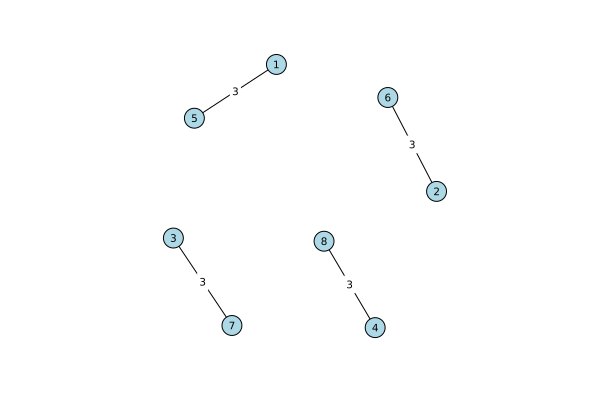

In [16]:
plot_solutions_graph(lm, cutoff=5, layout=:spring)

We can also compute the connected components

In [17]:
cc = connected_components(lm, cutoff=cutoff)  # returns an array of arrays
number_of_cc = length(cc)
@show cc
@show number_of_cc;

cc = [[1, 2, 3, 4, 5, 6, 7, 8]]
number_of_cc = 1


The number of connected components when `cutoff` varies

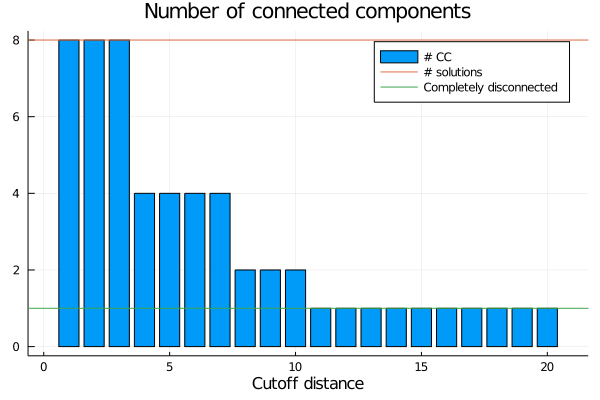

In [18]:
cutoffs = 1:n
n_cc = zeros(Int, length(cutoffs))

for i in eachindex(cutoffs)  # same as i=1:length(cutoffs) but cooler
    cc = connected_components(lm, cutoff=cutoffs[i])
    n_cc[i] = length(cc)
end

bar(n_cc, label="# CC", title="Number of connected components", xlabel="Cutoff distance")
hline!([8], label="# solutions")
hline!([1], label="Completely disconnected")

The weight enumeration function: number of solutions at distance $k$ from any other solution

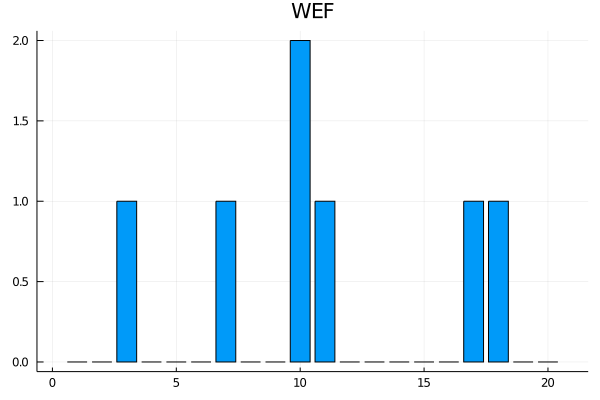

In [19]:
plot_wef(lm)

### Find a basis with small Hamming weight

Procedure:
- Start with any basis $V=\{v_i\}_{i=1:k}$. (Can be obtained with `nullspace(lm)`)
- Initialize an empty new basis $S=\emptyset$
- For each $i\in 1:k$ or until $dim(S)=dim(V)$ **
 * Find a path of "small hops" from $0$ to $v_i$: $p=(p_0=0, ..., p_m=v_i)$ (Can be obtained with `min_bottleneck_path(g::AbstractGraph`)
 * For $t=0:m-1$
   * The hop $p_{t+1}\oplus p_t$ is again a solution. If $p_{t+1}\oplus p_t \notin span(S)$:
    $S \leftarrow S \cup p_{t+1}\oplus p_t$
    
**_I though it could make sense to order the basis vectors $v_i$ in ascending order of minimum bottleneck so that we try first to add to S vectors with small weights_

In [24]:
newbasis = lightweight_nullspace(lm, verbose=true);

Finding a low-Hamming-weight basis...
	The basis I'm starting from has total Hamming weight 10.
	The graph of solutions obtained with the required cutoff is CONNECTED.
	I'm sorting basis vector in order of ascending min bottleneck. Values are: [3, 7, 10]
	Done! The new basis has total Hamming weight 10


## Statistics over multiple instances

In [25]:
ntrials = 500;
seed = 1000;

Things we might wanna do some statistics on:
- Number of connected components
- Size of connected components (comes for free from the previous + symmetry)
- Cutoff distance at which solutions becomes connected

In [26]:
cutoff_disconnected = zeros(Int, ntrials);
n_cc = [zeros(Int,n) for _ in 1:ntrials];

Store the number of connected components for each cutoff, for each trial

In [ ]:
for a in 1:ntrials
    lm = LossyModel(q,n,m,randseed=seed+a)
    # Compute the number of CC for each cutoff value
    n_cc[a] = [length(connected_components(solutions_graph(lm, cutoff=co))) for co in 1:n]    
end

Compute the cutoff value at which the graph becomes connected (i.e. it has got 1 connected component)

In [ ]:
for a in 1:ntrials
    cutoff_disconnected[a] = findfirst(n_cc[a] .== 1)
end

In [ ]:
histogram(cutoff_disconnected, bins=collect(1:maximum(cutoff_disconnected)), label="")
title!("Cutoff distance at which the graph becomes connected")
vline!([n], label="System size")

### The same, but with larger systems

In [24]:
n = 40;
k = 5;
m = n-k;

ntrials = 50;
cutoff_disconnected = zeros(Int, ntrials);
n_cc = [zeros(Int,n) for _ in 1:ntrials];

In [30]:
# Takes a couple of minutes with n=40, k=5, ntrials=50

for a in 1:ntrials
    lm = LossyModel(q,n,m,randseed=seed+a)
    # Compute the number of CC for each cutoff value
    n_cc[a] = [length(connected_components(solutions_graph(lm, cutoff=co))) for co in 1:n]   
    cutoff_disconnected[a] = findfirst(n_cc[a] .== 1)
    mod(a,10)==0 && println("Finished trial ", a ," of ", ntrials)
end

Finished trial 10 of 50
Finished trial 20 of 50
Finished trial 30 of 50
Finished trial 40 of 50
Finished trial 50 of 50


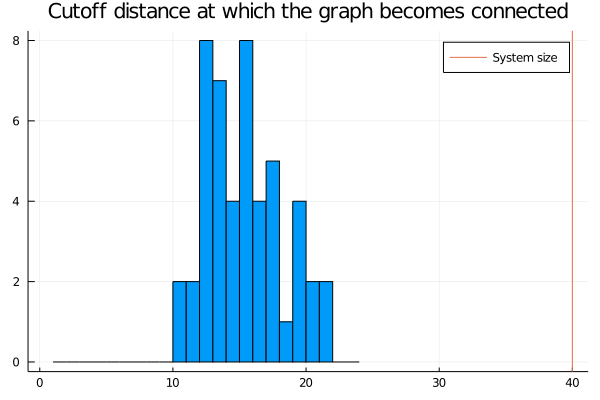

In [29]:
histogram(cutoff_disconnected, bins=collect(1:maximum(cutoff_disconnected)), label="")
title!("Cutoff distance at which the graph becomes connected")
vline!([n], label="System size")